## Step 2

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

le = pd.read_csv('life_expectancy_years.csv')
print('Life Expectancy')
print(le.columns)
pop = pd.read_csv('population_total.csv')
print('Population')
print(pop.columns)
fer = pd.read_csv('children_per_woman_total_fertility.csv')
print('Fertility')
print(fer.columns)

Life Expectancy
Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=302)
Population
Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=302)
Fertility
Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=302)


## Step 3

In [55]:
# I will use a key to insert indexes to differentiate the dataframes
fer_le_2015 = pd.concat([fer['2015'], le['2015']], keys=['fertility', 'life expectancy'], axis=1)
fer_le_2015.columns

Index(['fertility', 'life expectancy'], dtype='object')

## Step 4

In [56]:
print(len(fer_le_2015))
fer_le_2015 = fer_le_2015.dropna()
print(len(fer_le_2015))
fer.dropna(inplace=True)
le.dropna(inplace=True)

202
194


## Step 5

<Axes: xlabel='fertility', ylabel='life expectancy'>

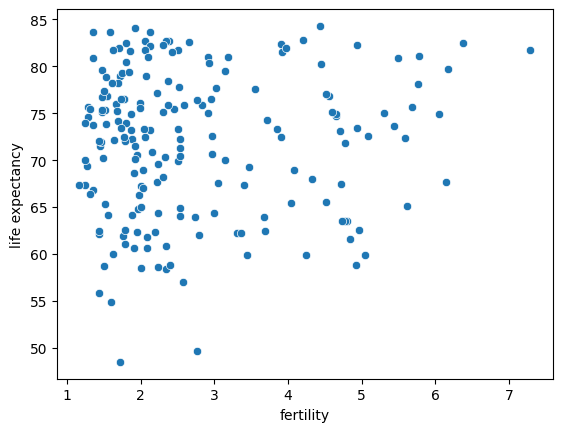

In [57]:
# Draw a scatterplot of fertility over life expectancy in 2015
sns.scatterplot(x='fertility', y='life expectancy', data=fer_le_2015)


## Step 6

202
185


<Axes: xlabel='fertility', ylabel='life_expectancy'>

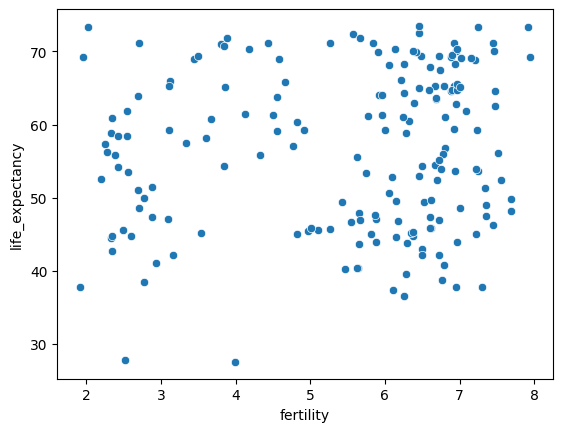

In [58]:
# I will use a key to insert indexes to differentiate the dataframes
fer_le_1960 = pd.concat([fer['1960'], le['1960']], keys=['fertility', 'life_expectancy'], axis=1)
print(len(fer_le_1960))
fer_le_1960 = fer_le_1960.dropna()
print(len(fer_le_1960))

# Draw a scatterplot of fertility over life expectancy in 1960
sns.scatterplot(x='fertility', y='life_expectancy', data=fer_le_1960)

The clearest change is the increase in fertility, from around 2 to around 6. The life expectancy on the other hand doesn't show a change just as drastic. People seem to be living longer in 2015.

## Step 7

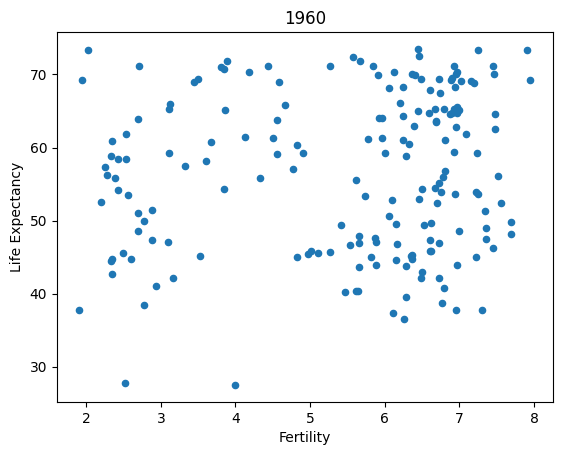

In [59]:
# Draw a scatterplot of fertility over life expectancy for any given year
def draw_scatterplot(year, size=None) -> None:
    
    pd.concat([fer[year], le[year]], keys=['fertility', 'life expectancy'], axis=1).dropna().plot(kind='scatter', x='fertility', y='life expectancy', s=size, xlabel='Fertility', ylabel='Life Expectancy', title=year)

draw_scatterplot('1960')

## Step 8

In [60]:
# Create a scatterplot for every year and save it to a its own file
for year in range(1960, 2016):
    draw_scatterplot(str(year))
    plt.savefig('scatterplots/scatterplot_' + str(year) + '.png')
    plt.close()

## Step 9

In [61]:
import imageio

plots = [
    imageio.imread(f'scatterplots/scatterplot_{year}.png')
    for year in range(1960,2015)
]

imageio.mimsave('animation.gif', plots, fps=10)

/var/folders/3g/5z5sh5l968zfhsm0b7025f_h0000gn/T/ipykernel_3174/3520155907.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.imread(f'scatterplots/scatterplot_{year}.png')


## Step 10

In [62]:
# Convert the population to a have a single format
def pop_convert_in_float(element):
    if element in pop['country'].values:
        return element
    elif element.endswith('k'):
        modified_element = float(element[:-1]) * 1000
        return modified_element
    elif element.endswith('M'):
        return float(element[:-1]) * 1000000
    elif element.endswith('B'):
        return float(element[:-1]) * 1000000000
    else:
        return float(element)
    print(element)
    

pop = pop.applymap(pop_convert_in_float)
pop


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,...,76600000.0,76400000.0,76300000.0,76100000.0,76000000.0,75800000.0,75600000.0,75400000.0,75200000.0,74900000.0
1,Angola,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,...,168000000.0,170000000.0,172000000.0,175000000.0,177000000.0,179000000.0,182000000.0,184000000.0,186000000.0,188000000.0
2,Albania,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,...,1330000.0,1300000.0,1270000.0,1250000.0,1220000.0,1190000.0,1170000.0,1140000.0,1110000.0,1090000.0
3,Andorra,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,...,63000.0,62900.0,62900.0,62800.0,62700.0,62700.0,62600.0,62500.0,62500.0,62400.0
4,United Arab Emirates,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,...,12300000.0,12400000.0,12500000.0,12500000.0,12600000.0,12700000.0,12700000.0,12800000.0,12800000.0,12900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,47300.0,47300.0,47300.0,47300.0,47300.0,47300.0,47300.0,47200.0,47200.0,...,315000.0,314000.0,314000.0,314000.0,313000.0,313000.0,312000.0,312000.0,311000.0,310000.0
193,Yemen,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,...,54500000.0,54400000.0,54300000.0,54100000.0,54000000.0,53800000.0,53700000.0,53500000.0,53400000.0,53200000.0
194,South Africa,1450000.0,1450000.0,1460000.0,1460000.0,1470000.0,1470000.0,1480000.0,1490000.0,1490000.0,...,79800000.0,79800000.0,79700000.0,79700000.0,79600000.0,79500000.0,79500000.0,79400000.0,79300000.0,79200000.0
195,Zambia,747000.0,758000.0,770000.0,782000.0,794000.0,806000.0,818000.0,831000.0,843000.0,...,74400000.0,75200000.0,76000000.0,76800000.0,77600000.0,78400000.0,79200000.0,80000000.0,80800000.0,81500000.0


## Step 11

In [63]:
# Divide the population by 100000 and use it to scale the size of the bubbles
def pop_divide_by_100000(element):
    if element in pop['country'].values:
        return element
    else:
        return element / 100000

pop = pop.applymap(pop_divide_by_100000)

# Check which countries are present in le and have the same one for fer
fer = fer[fer['country'].isin(le['country'])]
# Same for pop
pop = pop[pop['country'].isin(le['country'])]
# Make country the index if not already
fer.set_index('country', inplace=True) if not fer.index.name == 'country' else None
pop.set_index('country', inplace=True) if not pop.index.name == 'country' else None
le.set_index('country', inplace=True) if not le.index.name == 'country' else None


## The same output could have been obtained by using merge

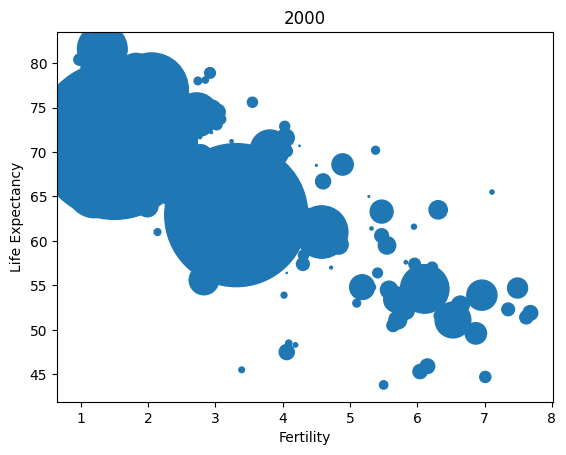

In [64]:
# Draw a scatterplot of fertility over life expectancy for the world and use population to scale the size of the bubbles
draw_scatterplot('2000', size=pop['2000'])

At the moment we can not distinguish which country is represented by which dot

## Step 12

In [65]:
conts = pd.read_csv('continents.csv')
# Extract only the columns with country name and continent
conts = conts.loc[:, ['name', 'four_regions']]
# Replace regions name with ints
conts['four_regions'] = conts['four_regions'].replace({'americas': 0, 'asia': 1, 'europe': 2, 'africa': 3})


# Add a continent column to the datasets where the name of the country is the same
fer = pd.merge(fer, conts, how='inner', left_on='country', right_on='name')
pop = pd.merge(pop, conts, how='inner', left_on='country', right_on='name')
le = pd.merge(le, conts, how='inner', left_on='country', right_on='name')

Text(0.5, 1.0, "Continents' Fertility vs Life Expectancy in 2015")

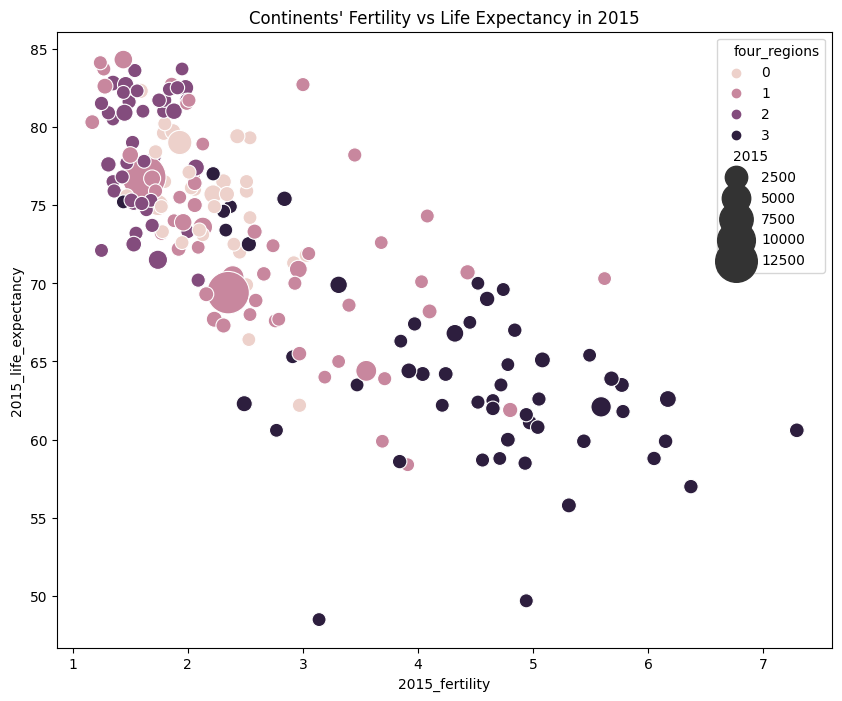

In [97]:
plt.figure(figsize=(10, 8))

# Merge the datasets fer and le
fer_le = pd.merge(fer, le, left_on='name', right_on='name', suffixes=('_fertility', '_life_expectancy'))

# Draw a scatterplot of fertility over life expectancy for the world and use population to scale the size of the bubbles, and use continents column to color the bubbles
sns.scatterplot(x='2015_fertility', y='2015_life_expectancy', data=fer_le, size=pop['2015'], hue=pop['four_regions'], sizes=(100, 1000))
plt.title('Continents\' Fertility vs Life Expectancy in 2015')